In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
tf.__version__

### load internet movie review database
each word is encoded with an index whcih is ranked by popularity<br>
each sentense is represented with a list of integers

In [46]:
imdb = keras.datasets.imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [22]:
print(f"Training entries: {len(train_data)}, labels: {len(train_label)}")

Training entries: 25000, labels: 25000


In [8]:
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


### pad the data to length of 256, truncate or pad the value

In [58]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [26]:
len(train_data)

25000

### build the model with 4 layers
the embedding layer is used to convert a sequence to a vector, whihc takes 2-dimension input and output a 3-dimension output<br>
the GAP layer is used to reduce 1 dimension from the input, where pool the average value, 3d -> 2d<br>
the dense layer only consider the last index dimension

In [70]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


### for the classification problem, using binary entropy to calculate the loss

In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

### add the validation data

In [60]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_label[:10000]
partial_y_train = train_label[10000:]

In [72]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 95us/sample - loss: 0.6919 - acc: 0.5579 - val_loss: 0.6898 - val_acc: 0.6051
Epoch 2/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6859 - acc: 0.6278 - val_loss: 0.6816 - val_acc: 0.6514
Epoch 3/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6730 - acc: 0.7107 - val_loss: 0.6661 - val_acc: 0.7141
Epoch 4/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6512 - acc: 0.7454 - val_loss: 0.6416 - val_acc: 0.7654
Epoch 5/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6197 - acc: 0.7856 - val_loss: 0.6081 - val_acc: 0.7858
Epoch 6/40
15000/15000 [==============================] - 1s 81us/sample - loss: 0.5788 - acc: 0.8078 - val_loss: 0.5678 - val_acc: 0.8067
Epoch 7/40
15000/15000 [==============================] - 1s 69us/sample - loss: 0.5320 - acc: 0.8323 - val_loss: 0.

In [62]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [73]:
model.evaluate(test_data, test_label)

25000/25000 [==============================] - 2s 62us/sample - loss: 0.3318 - acc: 0.8716


[0.33182385612010956, 0.87164]

In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### plot for accuracy and loss function for the training and validation set

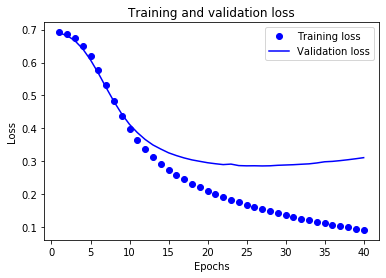

In [75]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

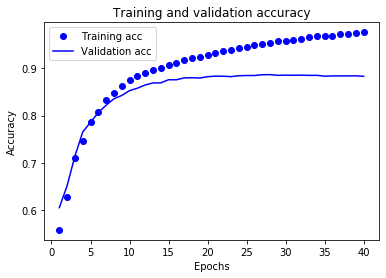

In [77]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
